In [130]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [325]:
from sklearn.model_selection import cross_val_predict, GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
# from sklearn.metrics import max_error
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

In [133]:
variable_list = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='Variable List', header=0)
pd.set_option('display.max_rows', None)
variable_list

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
0,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2010",LACCESS_POP10,CNTY10,Count
1,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2015",LACCESS_POP15,CNTY10,Count
2,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (% change), 20...",PCH_LACCESS_POP_10_15,CNTY10,% change
3,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2010",PCT_LACCESS_POP10,CNTY10,Percent
4,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2015",PCT_LACCESS_POP15,CNTY10,Percent
5,Access and Proximity to Grocery Store,ACCESS,Household Resources,"Low income & low access to store, 2010",LACCESS_LOWI10,CNTY10,Count
6,Access and Proximity to Grocery Store,ACCESS,Household Resources,"Low income & low access to store, 2015",LACCESS_LOWI15,CNTY10,Count
7,Access and Proximity to Grocery Store,ACCESS,Household Resources,"Low income & low access to store (% change), 2...",PCH_LACCESS_LOWI_10_15,CNTY10,% change
8,Access and Proximity to Grocery Store,ACCESS,Household Resources,"Low income & low access to store (%), 2010",PCT_LACCESS_LOWI10,CNTY10,Percent
9,Access and Proximity to Grocery Store,ACCESS,Household Resources,"Low income & low access to store (%), 2015",PCT_LACCESS_LOWI15,CNTY10,Percent


In [134]:
column_dict2 = {'Population, low access to store (%), 2010': 'PCT_LACCESS_POP10', 
               'Households, no car & low access to store, 2010': 'LACCESS_HHNV10',
               'Grocery stores/1,000 pop, 2009': 'GROCPTH09',
                'Supercenters & club stores/1,000 pop, 2009': 'SUPERCPTH09',
                'Convenience stores/1,000 pop, 2009': 'CONVSPTH09',
                'Specialized food stores/1,000 pop, 2009': 'SPECSPTH09', 
                'SNAP-authorized stores/1,000 pop, 2012': 'SNAPSPTH12', 
                'WIC-authorized stores/1,000 pop, 2012':'WICSPTH12',
                'Fast-food restaurants/1,000 pop, 2009': 'FFRPTH09',
                'Full-service restaurants/1,000 pop, 2009':'FSRPTH09',
                'Expenditures per capita, fast food, 2012': 'PC_FSRSALES12',
                'SNAP participants (% pop), 2012': 'PCT_SNAP12',
                'Students eligible for free lunch (%), 2009': 'PCT_FREE_LUNCH09',
                'Price of sodas/national average, 2010': 'SODA_PRICE10',
                'Farms with direct sales (%), 2012': 'PCT_LOCLSALE12',
                'Farmers markets/1,000 pop, 2009': 'FMRKTPTH09',
                'Vegetable acres harvested/1,000 pop, 2012': 'VEG_ACRESPTH12',
                'Berry acres/1,000 pop, 2012':'BERRY_ACRESPTH12',
                'Greenhouse veg and fresh herb sq feet/1,000 pop, 2012':'GHVEG_SQFTPTH12',
                'Adult diabetes rate, 2013': 'PCT_DIABETES_ADULTS13',
                'Adult obesity rate, 2013': 'PCT_OBESE_ADULTS13', 
                'Recreation & fitness facilities/1,000 pop, 2009': 'RECFACPTH09',
                '% White, 2010': 'PCT_NHWHITE10', 
                '% Black, 2010': 'PCT_NHBLACK10',
                variable_list.iloc[264, 3]:variable_list.iloc[264, 4],
                variable_list.iloc[265, 3]:variable_list.iloc[265, 4],
                variable_list.iloc[266, 3]:variable_list.iloc[266, 4],
                variable_list.iloc[268, 3]:variable_list.iloc[268, 4],
                variable_list.iloc[269, 3]:variable_list.iloc[269, 4]}

In [135]:
column_dict2 = {y:x for x,y in column_dict2.items()}

In [136]:
access = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='ACCESS', header=0)

In [137]:
access = access[['FIPS', "State", 'County', 'PCT_LACCESS_POP10', 'LACCESS_HHNV10']]

In [138]:
stores = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='STORES', header=0)

In [139]:
stores = stores[['GROCPTH09', 'SUPERCPTH09',
 'CONVSPTH09',
 'SPECSPTH09',
 'SNAPSPTH12',
 'WICSPTH12']]

In [140]:
restaurants = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='RESTAURANTS', header=0)

In [141]:
restaurants = restaurants[['FFRPTH09',
                           'FSRPTH09','PC_FSRSALES12']]


In [142]:
assistance = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='ASSISTANCE', header=0)

In [143]:
assistance = assistance[['PCT_SNAP12', 'PCT_FREE_LUNCH09']]

In [144]:
prices_taxes = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='PRICES_TAXES', header=0)

In [145]:
prices_taxes = prices_taxes[['SODA_PRICE10']]

In [146]:
local = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='LOCAL', header=0)

In [147]:
local = local[['PCT_LOCLSALE12',
 'FMRKTPTH09',
 'VEG_ACRESPTH12',
 'BERRY_ACRESPTH12',
 'GHVEG_SQFTPTH12']]

In [150]:
health = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='HEALTH', header=0)

In [151]:
health = health[['PCT_DIABETES_ADULTS13',
 'PCT_OBESE_ADULTS13',
 'RECFACPTH09']]

In [152]:
socioeconomic = pd.read_excel('./Data/Food_Atlas.xls', sheet_name='SOCIOECONOMIC', header=0)

In [153]:
socioeconomic = socioeconomic[['PCT_NHWHITE10',
 'PCT_NHBLACK10',
 'PCT_HISP10',
 'PCT_NHASIAN10',
 'PCT_NHNA10',
 'PCT_65OLDER10',
 'PCT_18YOUNGER10']]

In [154]:
combined_df = pd.concat([access, stores, restaurants, assistance, prices_taxes, local, health, socioeconomic], axis=1)


In [155]:
combined_df.head()

,FIPS,State,County,PCT_LACCESS_POP10,LACCESS_HHNV10,GROCPTH09,SUPERCPTH09,CONVSPTH09,SPECSPTH09,SNAPSPTH12,...,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,RECFACPTH09,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_65OLDER10,PCT_18YOUNGER10
0,1001,AL,Autauga,33.769657,664.216487,0.110834,0.018472,0.535698,0.036945,0.674004,...,13.0,34.1,0.073889,77.246156,17.582599,2.400542,0.855766,0.397647,11.995382,26.777959
1,1003,AL,Baldwin,19.318473,1571.779915,0.133775,0.033444,0.663300,0.117053,0.725055,...,10.4,27.4,0.100331,83.504787,9.308425,4.384824,0.735193,0.628755,16.771185,22.987408
2,1005,AL,Barbour,20.840972,406.142372,0.180786,0.000000,0.506201,0.072314,1.280590,...,18.4,44.4,0.036157,46.753105,46.691190,5.051535,0.389700,0.218524,14.236807,21.906982
3,1007,AL,Bibb,4.559753,275.060875,0.261540,0.043590,0.828211,0.000000,0.719122,...,14.8,40.3,0.043590,75.020729,21.924504,1.771765,0.096007,0.279293,12.681650,22.696923
4,1009,AL,Blount,2.700840,705.466783,0.104637,0.017440,0.540625,0.034879,0.657144,...,14.1,34.6,0.052319,88.887338,1.263040,8.070200,0.200621,0.497191,14.722096,24.608353


In [156]:
combined_df.isnull().sum()

FIPS                       0
State                      0
County                     0
PCT_LACCESS_POP10          0
LACCESS_HHNV10             0
GROCPTH09                  0
SUPERCPTH09                0
CONVSPTH09                 0
SPECSPTH09                 0
SNAPSPTH12                 0
WICSPTH12                  0
FFRPTH09                   0
FSRPTH09                   0
PC_FSRSALES12              0
PCT_SNAP12                 0
PCT_FREE_LUNCH09          75
SODA_PRICE10              34
PCT_LOCLSALE12           287
FMRKTPTH09                 6
VEG_ACRESPTH12           612
BERRY_ACRESPTH12         810
GHVEG_SQFTPTH12          896
PCT_DIABETES_ADULTS13      1
PCT_OBESE_ADULTS13         1
RECFACPTH09                0
PCT_NHWHITE10              0
PCT_NHBLACK10              0
PCT_HISP10                 0
PCT_NHASIAN10              0
PCT_NHNA10                 0
PCT_65OLDER10              0
PCT_18YOUNGER10            0
dtype: int64

In [129]:
# Drop columns with too many missing values 

In [ ]:
combined_df=combined_df.drop('VEG_ACRESPTH12', axis=1)

In [159]:
combined_df=combined_df.drop('BERRY_ACRESPTH12', axis=1)

In [160]:
combined_df=combined_df.drop('GHVEG_SQFTPTH12', axis=1)

In [ ]:
# Drop observations that are missing target variable (only one observation)

In [164]:
combined_df = combined_df[np.isfinite(combined_df['PCT_OBESE_ADULTS13'])]


# Impute missing values for columns that have a manageable number of missing values with median values:
PCT_FREE_LUNCH09          
SODA_PRICE10              
PCT_LOCLSALE12           
FMRKTPTH09                 

In [165]:
imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [166]:
combined_df[['PCT_FREE_LUNCH09']] = imputer.fit_transform(combined_df[['PCT_FREE_LUNCH09']])

In [167]:
combined_df[['SODA_PRICE10']] = imputer.fit_transform(combined_df[['SODA_PRICE10']])

In [168]:
combined_df[['PCT_LOCLSALE12']] = imputer.fit_transform(combined_df[['PCT_LOCLSALE12']])

In [169]:
combined_df[['FMRKTPTH09']] = imputer.fit_transform(combined_df[['FMRKTPTH09']])

In [196]:
combined_df = combined_df.rename(columns = column_dict2)

In [199]:
newX=combined_df.drop(['State', 'County', 'FIPS', 'Adult obesity rate, 2013'], axis=1)
newX = newX.apply(pd.to_numeric)
        

In [200]:
newY=combined_df['Adult obesity rate, 2013']

In [222]:
RANDOM_STATE = 42
FIG_SIZE = (10, 10)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(newX, newY,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

In [203]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [204]:
scaler = StandardScaler().fit(X_train)

In [205]:
scaler.mean_

array([2.38257365e+01, 6.55074760e+02, 2.72241374e-01, 1.57573570e-02,
       5.92330005e-01, 5.80291839e-02, 8.68136940e-01, 2.31087929e-01,
       5.60856572e-01, 7.86284489e-01, 6.54176734e+02, 1.50873100e+01,
       4.07108829e+01, 9.91500542e-01, 9.46606353e-01, 3.58995663e-02,
       1.11668031e+01, 7.73501313e-02, 7.87936636e+01, 8.28226028e+00,
       8.24329054e+00, 1.15070277e+00, 1.83763245e+00, 1.58495901e+01,
       2.34397094e+01])

In [206]:
X_train = scaler.transform(X_train) 

In [207]:
X_test = scaler.transform(X_test) 

In [208]:
len(X_test), len(y_test)

(943, 943)

In [209]:
lr = LinearRegression()

In [210]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [211]:
lr.score(X_test,y_test)

0.6307506824720257

In [212]:
lr.score(X_train, y_train)

0.63396552979607

In [213]:
rr = Ridge(alpha=0.01)

In [214]:
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [215]:
rr100 = Ridge(alpha=100) #  comparison with alpha value

In [216]:
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [217]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [218]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.63396552979607
linear regression test score: 0.6307506824720257
ridge regression train score low alpha: 0.6339655283376431
ridge regression test score low alpha: 0.6307512450454784
ridge regression train score high alpha: 0.6313700548740675
ridge regression test score high alpha: 0.6315842409481089


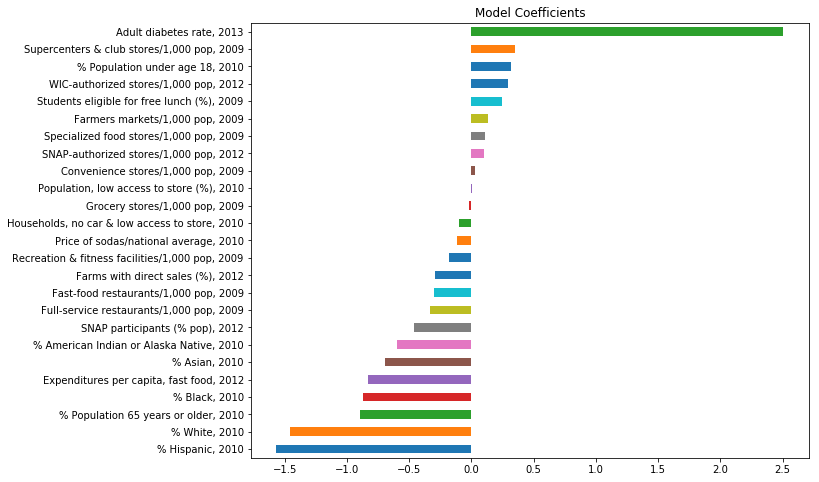

In [225]:
predictors = newX.columns

coef = pd.Series(lr.coef_,predictors).sort_values()

coef.plot(kind='barh', title='Model Coefficients', figsize=(10,8))

In [226]:
lassoReg = Lasso(alpha=0.3, normalize=True)

In [227]:
lassoReg.fit(X_train, y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [228]:
lassoReg.score(X_test, y_test)

-0.004015062747538378

In [241]:
rfr = RandomForestRegressor(random_state=0, n_estimators = 600, criterion='mse')

In [242]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [243]:
print(rfr.score(X_test, y_test))

0.7278762830822356


In [244]:
predictions = rfr.predict(X_test)

Text(0.5,1,'Predicted 2013 Obesity Rate versus Actual Obesity Rate in U.S. Counties')

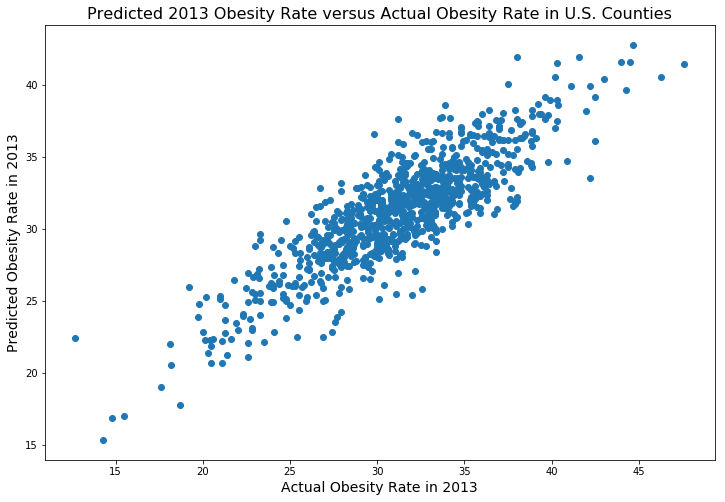

In [258]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test,predictions)
plt.xlabel('Actual Obesity Rate in 2013', fontsize = 14)
plt.ylabel('Predicted Obesity Rate in 2013', fontsize = 14)
plt.title('Predicted 2013 Obesity Rate versus Actual Obesity Rate in U.S. Counties', fontsize = 16)

In [280]:
feature_importances = pd.DataFrame(rfr.feature_importances_,
                                   index = newX.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)                                                          

In [285]:
feature_importances = feature_importances.sort_values('importance')

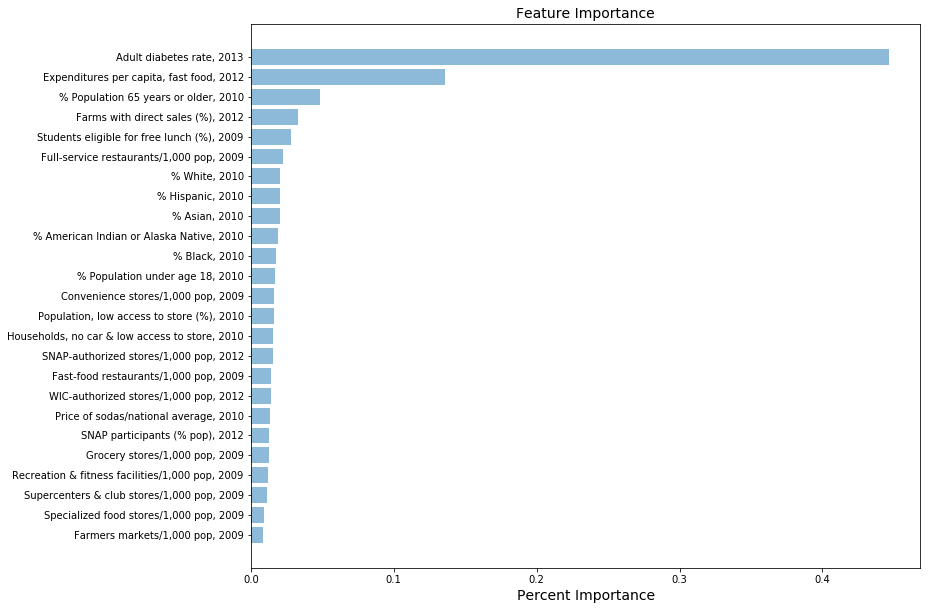

In [287]:
fig, ax = plt.subplots(figsize=(12,10))
plt.barh(feature_importances.index,feature_importances.importance, align='center', alpha=0.5)
plt.xlabel('Percent Importance', fontsize= 14)
plt.title('Feature Importance', fontsize= 14)

plt.show()

In [288]:
# Rerun Random Forest without diabetes: 

In [298]:
newX=newX.drop('Adult diabetes rate, 2013', axis = 1)

In [299]:
X_train, X_test, y_train, y_test = train_test_split(newX, newY,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

In [300]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [301]:
scaler = StandardScaler().fit(X_train)

In [302]:
X_train = scaler.transform(X_train) 

In [303]:
X_test = scaler.transform(X_test) 

In [304]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [305]:
print(rfr.score(X_test, y_test))

0.6892402795863068


In [306]:
predictions = rfr.predict(X_test)

Text(0.5,1,'Predicted 2013 Obesity Rate versus Actual Obesity Rate in U.S. Counties')

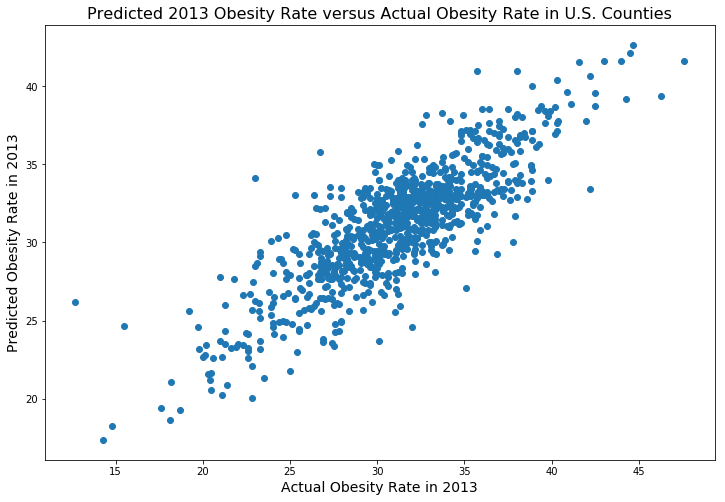

In [307]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test,predictions)
plt.xlabel('Actual Obesity Rate in 2013', fontsize = 14)
plt.ylabel('Predicted Obesity Rate in 2013', fontsize = 14)
plt.title('Predicted 2013 Obesity Rate versus Actual Obesity Rate in U.S. Counties', fontsize = 16)

In [308]:
feature_importances = pd.DataFrame(rfr.feature_importances_,
                                   index = newX.columns,
                                    columns=['importance']).sort_values('importance', ascending=False) 

In [309]:
feature_importances = feature_importances.sort_values('importance')

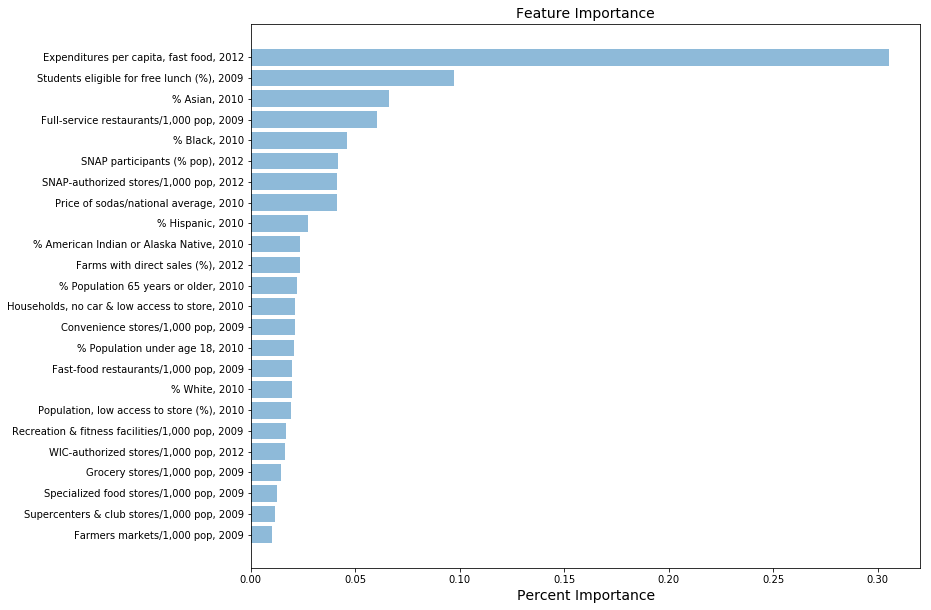

In [310]:
fig, ax = plt.subplots(figsize=(12,10))
plt.barh(feature_importances.index,feature_importances.importance, align='center', alpha=0.5)
plt.xlabel('Percent Importance', fontsize= 14)
plt.title('Feature Importance', fontsize= 14)

plt.show()

In [315]:
metrics.mean_absolute_error(y_test, predictions)

1.9310190880169673

In [316]:
metrics.mean_squared_error(y_test, predictions)

6.292633427359495

In [320]:
print(metrics.explained_variance_score(y_test, predictions, sample_weight=None, multioutput='uniform_average'))

0.6892426609759497
